# MOXSI Filter Trade Study

In [1]:
import matplotlib.pyplot as plt
import astropy.units as u
from mocksipipeline.detector.filter import ThinFilmFilter
import numpy as np
import copy

Model thin film aluminum filter according to prescription described by Ben Zeiger:  "I have generally found a good agreement between modeling and measurements with about 3nm Al2O3 per exposed surface and 1% of the bulk also oxidized -- 100nm Al measurements are generally fit pretty well with 93nm Al and 7nm Al2O3, for example. "

In [2]:
wavelength = np.linspace(1,1000,1000) * u.angstrom
hc = 1239.84 * u.eV * u.nm
E = hc/wavelength

table = 'Henke'

AL_thickness = 100*u.nm
Al2O3_thickness = 3*u.nm #per exposed Aluminum size

Al_Oxide_Layer = ThinFilmFilter(elements=['Al','O'],quantities=[2,3],thickness=Al2O3_thickness,
                                xrt_table=table)
Al_Layer = ThinFilmFilter(elements='Al',thickness = 0.99*AL_thickness-2*Al2O3_thickness,
                          xrt_table=table)
Pure_Al_Layer = ThinFilmFilter(elements='Al',thickness = AL_thickness,
                               xrt_table=table)



In [3]:
Thin_Poly_Layer = ThinFilmFilter(elements=['C','H','N','O'],quantities=[22,10,2,5],
                            density=1.43*u.g/u.cm**3,thickness = 100*u.nm)


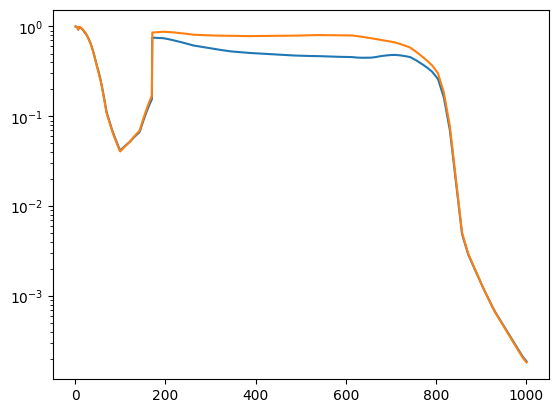

In [4]:
Al_throughput = Al_Oxide_Layer.transmissivity(E)**2 * Al_Layer.transmissivity(E)
Al_pure_throughput = Pure_Al_Layer.transmissivity(E)

fig, ax = plt.subplots()
ax.plot(wavelength,Al_throughput)
ax.plot(wavelength,Al_pure_throughput)

ax.set_yscale('log')

Compare the throughput of two Al filters against a thin Al/Poly filter

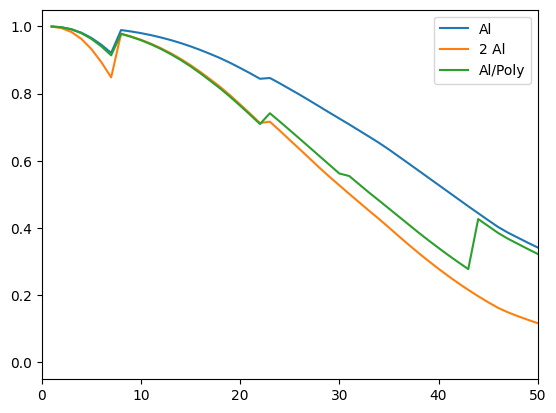

In [5]:
fig,ax = plt.subplots()
ax.plot(wavelength,Al_throughput,label='Al')
ax.plot(wavelength,Al_throughput**2,label='2 Al')
ax.plot(wavelength,Al_throughput*Thin_Poly_Layer.transmissivity(E),label='Al/Poly')

# ax.set_yscale('log')
ax.set_xlim([0,50])

ax.legend()

In [6]:
Grating_Poly_Layer = copy.copy(Thin_Poly_Layer)
Grating_Poly_Layer.thickness = 1*u.micron
Grating_Cr = ThinFilmFilter(elements='Cr',thickness=5*u.nm)
Grating_Au = ThinFilmFilter(elements='Au',thickness=20*u.nm)




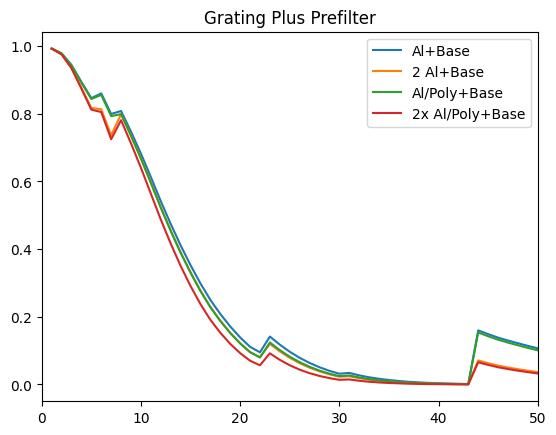

In [7]:
grating_w_AlPoly_throughput = Grating_Poly_Layer.transmissivity(E) * Al_throughput * Thin_Poly_Layer.transmissivity(E)
grating_w_2AlPoly_throughput = Grating_Poly_Layer.transmissivity(E) * Al_throughput**2 * Thin_Poly_Layer.transmissivity(E)**2
plating_base_throughput = Grating_Cr.transmissivity(E)* Grating_Au.transmissivity(E)

fig,ax = plt.subplots()
# ax.plot(wavelength,Grating_Poly_Layer.transmissivity(E)*Al_throughput,label='Al')
# ax.plot(wavelength,Grating_Poly_Layer.transmissivity(E)*Al_throughput**2,label='2 Al')
# ax.plot(wavelength, grating_w_AlPoly_throughput, label='Al/Poly')
ax.plot(wavelength,Grating_Poly_Layer.transmissivity(E)*Al_throughput*plating_base_throughput,label='Al+Base')
ax.plot(wavelength,Grating_Poly_Layer.transmissivity(E)*Al_throughput**2*plating_base_throughput,label='2 Al+Base')
ax.plot(wavelength, grating_w_AlPoly_throughput*plating_base_throughput, label='Al/Poly+Base')
ax.plot(wavelength, grating_w_2AlPoly_throughput*plating_base_throughput, label='2x Al/Poly+Base')



ax.set_title('Grating Plus Prefilter')

# ax.set_yscale('log')
# ax.set_ylim([.001,1])

ax.set_xlim([0,50])

ax.legend()

Text(0.5, 0, 'Angstroms')

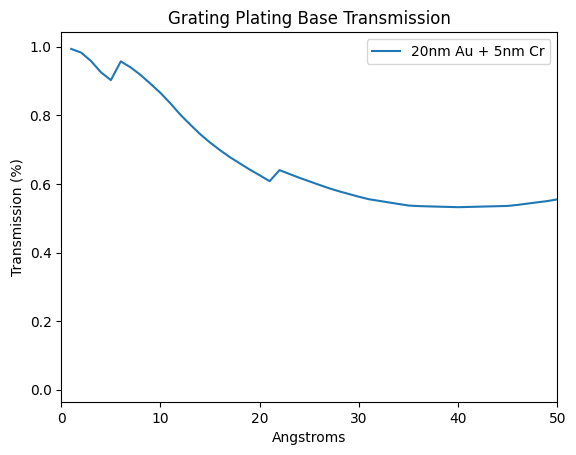

In [8]:
fig, ax = plt.subplots()
ax.plot(wavelength,plating_base_throughput,label='20nm Au + 5nm Cr')
ax.set_title('Grating Plating Base Transmission')
ax.set_xlim([0,50])
ax.legend()
ax.set_ylabel('Transmission (%)')
ax.set_xlabel('Angstroms')